In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
## Loading the dataset
df = pd.read_csv('/Users/purva/Desktop/Data Science Boot Camp/weatherAUS.csv')

In [63]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [3]:
## Obtaining some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
## From above information, it can be seen that columns Evaporation, Sunsine, Cloud9am and Cloud3pm 
## have lot of null values. (about 50 to 60%). 
## Droping these 4 columns from the dataset
df = df.drop(['Sunshine','Evaporation','Cloud9am','Cloud3pm'], axis =1)

In [5]:
## Dropping all the rows which has atleast one null value
df = df.dropna(how='any') 

In [6]:
df['RainToday'] = np.where(df['RainToday']=='No', 0, 1)
df['RainTomorrow'] = np.where(df['RainTomorrow']=='No', 0, 1)

In [7]:
df = pd.get_dummies(df)
df = df.dropna(axis=1)

In [74]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


In [8]:
from sklearn import decomposition
from sklearn import preprocessing

## Standardizing data

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Y = df['RainTomorrow']
X = df.loc[:,df.columns!='RainTomorrow']

In [75]:
pca = decomposition.PCA(n_components = 100)

In [76]:
pc = pca.fit_transform(X)

In [77]:
r = pca.explained_variance_ratio_

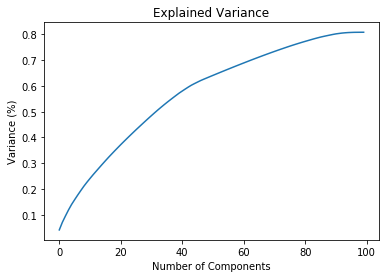

In [78]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [79]:
pc_df = pd.DataFrame(data = pc)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.007509,-0.458738,-0.098516,-0.557211,0.609798,0.201226,-0.270994,-0.202182,0.302531,-0.275011,...,0.012846,0.097227,-0.083630,-0.017177,0.087154,-0.078489,-0.089400,0.041132,0.016572,0.001248
1,-0.148732,-0.436000,-0.110024,-0.373684,0.392612,0.082000,-0.153722,0.284438,-0.143770,0.218086,...,-0.018407,-0.066504,-0.039904,0.002261,-0.095720,0.015094,0.002273,0.006375,0.008578,0.001638
2,-0.081495,-0.301184,-0.291971,-0.731127,0.150095,-0.478423,-0.444996,-0.172780,0.192450,0.323953,...,-0.024144,-0.002228,0.083111,-0.006505,-0.001288,-0.059867,-0.022111,0.033471,0.008729,-0.004257
3,-0.539585,0.208924,0.239917,-0.143679,0.002673,0.018234,0.071243,-0.165010,-0.132805,-0.090059,...,-0.045841,-0.089176,0.003340,-0.025817,0.044194,-0.013643,0.012041,0.016233,0.013728,0.002415
4,-0.234538,-0.341753,0.130809,-0.338364,0.276443,0.231379,-0.175869,-0.022263,0.089610,-0.068405,...,-0.018842,0.111729,-0.100210,-0.015886,0.002950,-0.023467,-0.042121,-0.055278,-0.010511,0.000905


In [56]:
# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = pc_df[:offset], Y[:offset]

# And put 20% in the test set.
X_test, y_test = pc_df[offset:], Y[offset:]

## DECISION TREE

In [58]:
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pydotplus
import graphviz
import time
from sklearn.model_selection import GridSearchCV

In [93]:
start_time = time.time()
decisiontree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_depth = 4, max_features = 1)

decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
score = cross_val_score(decisiontree, X_test, y_test, cv=5)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(" Score is " , score)
print(" Accuracy is " , accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

 Score is  [0.80301018 0.75033201 0.67190613 0.79273694 0.78498671]
 Accuracy is  0.7927385432809386
--- 0.2898569107055664 seconds ---


## RANDOM FOREST

In [33]:
from sklearn import ensemble

In [96]:
start_time = time.time()
randomforest = ensemble.RandomForestClassifier(n_estimators= 8)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score = cross_val_score(randomforest, X_test, y_test, cv=5)
score1 = randomforest.score(X_test, y_test)
print(" Score is " , score)
print(" Percentage Accuracy is " , score1)
print("--- %s seconds ---" % (time.time() - start_time))

 Score is  [0.80123949 0.40681718 0.3887536  0.59433127 0.81067316]
 Percentage Accuracy is  0.8154970112906796
--- 18.92970895767212 seconds ---


## LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
start_time = time.time()
lr = LogisticRegression(C=1e9)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = cross_val_score(randomforest, X_test, y_test, cv=5)
score1 = lr.score(X_test, y_test)
print(" Score is " , score)
print(" Percentage Accuracy is " , score1)
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Score is  [0.81783975 0.4021691  0.40336507 0.72320638 0.75376439]
 Percentage Accuracy is  0.4616338277617888
--- 89.64322710037231 seconds ---


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [40]:
start_time = time.time()
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
neighbors.fit(X_train, y_train)
y_pred = neighbors.predict(X_test)
score = cross_val_score(randomforest, X_test, y_test, cv=5)
score1 = neighbors.score(X_test, y_test)
print(" Score is " , score)
print(" Percentage Accuracy is " , score1)
print("--- %s seconds ---" % (time.time() - start_time))

 Score is  [0.81916777 0.40681718 0.39583795 0.68932684 0.79517272]
 Percentage Accuracy is  0.8181979189727695
--- 850.5365979671478 seconds ---
